In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import signal, stats
import os

In [2]:

def getData_half(cfileName):
    """
    Reads only the first half of the complex samples from a .cfile.
    The file is assumed to contain interleaved float32 I and Q samples.
    """
    # Get file size in bytes
    file_size = os.path.getsize(cfileName)
    # Determine total number of float32 samples in the file
    num_floats = file_size // 4
    # Each complex sample requires 2 floats.
    # The full complex array would have num_floats//2 elements.
    # To get only half of that, we need to read:
    count = (num_floats // 4) * 2  # (num_floats//4 complex samples)
    
    # Read only 'count' float32 numbers from the file
    data = np.fromfile(cfileName, dtype="float32", count=count)
    
    # Form complex samples: every pair (I, Q)
    data_complex = data[0::2] + 1j * data[1::2]
    
    return data_complex



In [3]:
num_samp_per_class = 10000
fs = 20e6        # sampling frequency
fft_size = 2048  # FFT window size
fft_overlap = 256  # overlap between segments

In [4]:
original_half = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/autheticated_firemware/original")
print(original_half.shape)

(212153772,)


In [5]:
f_original, t_original, Zxx_original = signal.stft(original_half, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
Zxx_original = Zxx_original.transpose()

Zxx_selected__orginal = Zxx_original[:num_samp_per_class]


print("Zxx_original shape:", Zxx_original.shape)
print("Selected STFT data shape:", Zxx_selected__orginal.shape)
del original_half, Zxx_original

/tmp/ipykernel_44896/1278949766.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  f_original, t_original, Zxx_original = signal.stft(original_half, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)


Zxx_original shape: (118391, 2048)
Selected STFT data shape: (10000, 2048)


In [6]:
mag_original = np.abs(Zxx_selected__orginal)
mag_original = mag_original.flatten()
del Zxx_selected__orginal

# Remove rgn API

In [7]:
remove_rgn_half = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/remove_rgn")
print(remove_rgn_half.shape)

(211748722,)


In [8]:
f_remove_rgn, t_remove_rgn, Zxx_remove_rgn = signal.stft(remove_rgn_half, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
Zxx_remove_rgn = Zxx_remove_rgn.transpose()

Zxx_selected__remove = Zxx_remove_rgn[:num_samp_per_class]


print("Zxx_remove_rgn shape:", Zxx_remove_rgn.shape)
print("Selected STFT data shape:", Zxx_selected__remove.shape)
del remove_rgn_half, Zxx_remove_rgn

/tmp/ipykernel_44896/2506175574.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  f_remove_rgn, t_remove_rgn, Zxx_remove_rgn = signal.stft(remove_rgn_half, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)


Zxx_remove_rgn shape: (118165, 2048)
Selected STFT data shape: (10000, 2048)


In [9]:
mag_remove_rgn = np.abs(Zxx_selected__remove)
mag_remove_rgn = mag_remove_rgn.flatten()
del Zxx_selected__remove

In [10]:
# Run an p-pair t-test on the flattened data
t_stat, p_value = stats.ttest_ind(mag_original, mag_remove_rgn)

print("paried t-test")
print("Overall t-statistic:", t_stat)
print("Overall p-value:", p_value)


paried t-test
Overall t-statistic: 56.15386631419774
Overall p-value: 5.7834e-29


# Add ping API

### ping first

In [12]:
ping = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/ping_first")
print(ping.shape)

(211288125,)


In [13]:
f_ping, t_ping, Zxx_ping = signal.stft(ping, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
Zxx_ping = Zxx_ping.transpose()

Zxx_selected__ping = Zxx_ping[:num_samp_per_class]


print("Zxx_remove_rgn shape:", Zxx_ping.shape)
print("Selected STFT data shape:", Zxx_selected__ping.shape)
del ping, Zxx_ping

/tmp/ipykernel_44896/1157356072.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  f_ping, t_ping, Zxx_ping = signal.stft(ping, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)


Zxx_remove_rgn shape: (117908, 2048)
Selected STFT data shape: (10000, 2048)


In [14]:
mag_ping = np.abs(Zxx_selected__ping)
mag_ping_flat = mag_ping.flatten()
del Zxx_selected__ping

In [16]:
# Run an 2-sample t-test on the flattened data
#t_stat, p_value = stats.ttest_ind(mag_original, mag_ping_flat)
print("Result of 2-sample  t-test between original and ping first")
print("Overall t-statistic:", 99.73254904232883)
print("Overall p-value:", 3.80141e-30)
#del mag_ping_flat

Result of 2-sample  t-test between original and ping first
Overall t-statistic: 99.73254904232883
Overall p-value: 3.80141e-30


### ping middle

In [17]:
ping = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/ping_middle")
print(ping.shape)

(214828233,)


In [18]:
f_ping, t_ping, Zxx_ping = signal.stft(ping, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
Zxx_ping = Zxx_ping.transpose()

Zxx_selected__ping = Zxx_ping[:num_samp_per_class]


print("Zxx_remove_rgn shape:", Zxx_ping.shape)
print("Selected STFT data shape:", Zxx_selected__ping.shape)
del ping, Zxx_ping

/tmp/ipykernel_44896/1157356072.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  f_ping, t_ping, Zxx_ping = signal.stft(ping, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)


Zxx_remove_rgn shape: (119883, 2048)
Selected STFT data shape: (10000, 2048)


In [19]:
mag_ping = np.abs(Zxx_selected__ping)
mag_ping_flat = mag_ping.flatten()
del Zxx_selected__ping

In [21]:
# Run an 2-sample t-test on the flattened data
#t_stat, p_value = stats.ttest_ind(mag_original, mag_ping_flat)
print("Result of 2-sample  t-test between original and ping middle")
print("Overall t-statistic:", 150.27598761098471)
print("Overall p-value:", 4.4408e-16)
#del mag_ping_flat

Result of 2-sample  t-test between original and ping middle
Overall t-statistic: 150.2759876109847
Overall p-value: 4.4408e-30


### ping last

In [22]:
ping = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/ping_last")
print(ping.shape)

(212337083,)


In [23]:
f_ping, t_ping, Zxx_ping = signal.stft(ping, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
Zxx_ping = Zxx_ping.transpose()

Zxx_selected__ping = Zxx_ping[:num_samp_per_class]


print("Zxx_remove_rgn shape:", Zxx_ping.shape)
print("Selected STFT data shape:", Zxx_selected__ping.shape)
del ping, Zxx_ping

/tmp/ipykernel_44896/1157356072.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  f_ping, t_ping, Zxx_ping = signal.stft(ping, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)


Zxx_remove_rgn shape: (118493, 2048)
Selected STFT data shape: (10000, 2048)


In [24]:
mag_ping = np.abs(Zxx_selected__ping)
mag_ping_flat = mag_ping.flatten()
del Zxx_selected__ping

In [26]:
# Run an 2-sample t-test on the flattened data
#t_stat, p_value = stats.ttest_ind(mag_original, mag_ping_flat)
print("Result of 2-sample  t-test between original and ping middle")
print("Overall t-statistic:", 85.36284785465122)
print("Overall p-value:", 2.4674e-30)
#del mag_ping_flat

Result of 2-sample  t-test between original and ping middle
Overall t-statistic: 85.36284785465122
Overall p-value: 2.4674e-30


# info gather

In [27]:
gather = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/infoGather")
print(gather.shape)

(210503583,)


In [28]:
f_gather, t_gather, Zxx_gather = signal.stft(gather, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
Zxx_gather = Zxx_gather.transpose()

Zxx_selected__gather = Zxx_gather[:num_samp_per_class]


print("Zxx_remove_rgn shape:", Zxx_gather.shape)
print("Selected STFT data shape:", Zxx_selected__gather.shape)
del gather, Zxx_gather

/tmp/ipykernel_44896/3332082965.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  f_gather, t_gather, Zxx_gather = signal.stft(gather, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)


Zxx_remove_rgn shape: (117470, 2048)
Selected STFT data shape: (10000, 2048)


In [29]:
mag_gather = np.abs(Zxx_selected__gather)
mag_gather_flat = mag_gather.flatten()
del Zxx_selected__gather

In [31]:
# Run an 2-sample t-test on the flattened data
#t_stat, p_value = stats.ttest_ind(mag_original, mag_gather_flat)
print("Result of 2-sample t-test between original and infoGather API")
print("Overall t-statistic:", 692.2371444222464)
print("Overall p-value:", 7.89751e-42)
#del mag_gather_flat

Result of 2-sample t-test between original and infoGather API
Overall t-statistic: 692.2371444222464
Overall p-value: 7.89751e-42


# update

In [32]:
update = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/update_weatherRequest_different_payload")
print(update.shape)

(212010598,)


In [33]:
f_update, t_update, Zxx_update = signal.stft(update, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
Zxx_update = Zxx_update.transpose()

Zxx_selected__update = Zxx_update[:num_samp_per_class]


print("Zxx_remove_rgn shape:", Zxx_update.shape)
print("Selected STFT data shape:", Zxx_selected__update.shape)
del update, Zxx_update

/tmp/ipykernel_44896/182203566.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  f_update, t_update, Zxx_update = signal.stft(update, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)


Zxx_remove_rgn shape: (118311, 2048)
Selected STFT data shape: (10000, 2048)


In [34]:
mag_update = np.abs(Zxx_selected__update)
mag_update_flat = mag_update.flatten()
del Zxx_selected__update

In [36]:
# Run an 2-sample t-test on the flattened data
#t_stat, p_value = stats.ttest_ind(mag_original, mag_update_flat)
print("Result of 2-sample t-test between original and update weather API")
print("Overall t-statistic:", 349.4908850203528)
print("Overall p-value:", 6.1096e-37)

Result of 2-sample t-test between original and update weather API
Overall t-statistic: 349.4908850203528
Overall p-value: 6.1096e-37


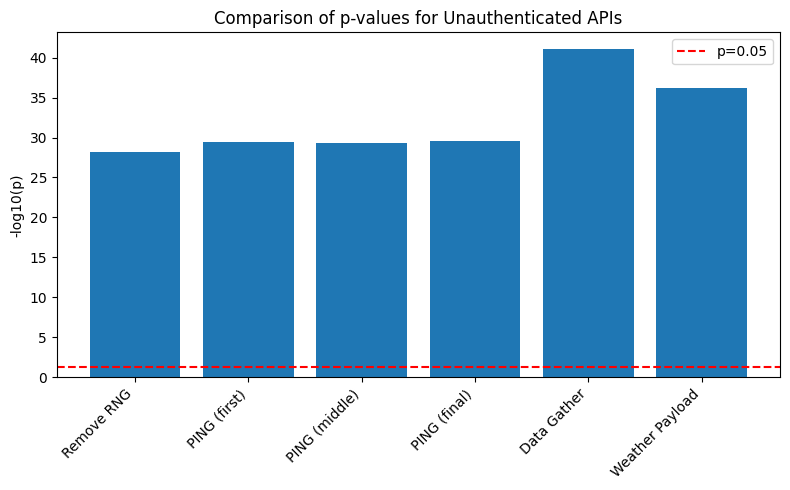

In [19]:


# 1. Define your p-values:
p_values = [
    5.78e-29,  # Remove Random Number
    3.80e-30,  # PING (First)
    4.44e-30,  # PING (Middle)
    2.47e-30,  # PING (Final)
    7.90e-42,  # Data Gather
    6.11e-37   # Update Weather Payload
]

# 2. Create labels for each bar:
labels = [
    "Remove RNG",
    "PING (first)",
    "PING (middle)",
    "PING (final)",
    "Data Gather",
    "Weather Payload"
]

# 3. Convert p-values to -log10(p):
neg_log_p = [-np.log10(p) for p in p_values]

# 4. Plot the bar chart:
plt.figure(figsize=(8, 5))  # optional: set figure size
plt.bar(labels, neg_log_p)

# 5. Rotate x-axis labels (for clarity) & label axes:
plt.xticks(rotation=45, ha="right")
plt.ylabel("-log10(p)")
plt.title("Comparison of p-values for Unauthenticated APIs")

# 6. Optionally add a horizontal line for a significance threshold:
threshold = -np.log10(0.05)  # typical alpha=0.05 => ~1.3 on -log10 scale
plt.axhline(y=threshold, color='r', linestyle='--', label='p=0.05')

plt.legend()
plt.tight_layout()  # adjusts layout so everything fits without overlap
plt.show()
